# Pymaceuticals Inc.

### __Analysis__ 

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read csv data
clintrial_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
drug_df = pd.read_csv("raw_data/mouse_drug_data.csv")

# Remove duplicate value from clintrial_df (take the first value of duplicated ID and Timepoint)
clintrial_df = clintrial_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep= 'first')
# clintrial_df.loc[clintrial_df["Mouse ID"] == 'g989']

# Merge both dataframes
merged_df = pd.merge(clintrial_df, drug_df, on="Mouse ID", how="outer")
# print(len(merged_df))
merged_df.sort_values(by = ['Mouse ID','Timepoint']).head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
901,a203,0,45.000000,0,Infubinol
902,a203,5,48.508468,0,Infubinol
903,a203,10,51.852437,1,Infubinol
904,a203,15,52.777870,1,Infubinol
905,a203,20,55.173336,1,Infubinol
906,a203,25,56.793208,1,Infubinol
907,a203,30,59.523197,1,Infubinol
908,a203,35,61.931650,2,Infubinol
909,a203,40,63.593490,2,Infubinol
910,a203,45,67.973419,2,Infubinol


### __Tumor Response to Treatment__

In [2]:
#Take the merged_df and group by both Drug and Timepoint
tresp_df = merged_df.copy()
tresp_df = tresp_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
# tresp_df = tresp_df.set_index(['Drug','Timepoint'], inplace=True)
trmt_df = pd.DataFrame(tresp_df)

# tresp_df = tresp_df.rename(columns={0:'Tumor Volumne (mm3)'})
# tresp_df
# df = df.rename(columns= {0: 'list'})
# df = df.set_index(['Company', 'date'], inplace=True)
# df.index.name = 'index'
# pd.DataFrame({'email':sf.index, 'list':sf.values})
# tresp_df.rename(index = str, columns = {'Tumor Volume (mm3)'}, inplace = True) 
# tresp_df.rename('Tumor Volume (mm3)')
trmt_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.525662
          10                  49.444904
          15                  51.442472
          20                  54.037882
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Metastatic sites for 'Capomulin
cap_df = merged_df.copy()
cap_df = cap_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
cap_df = pd.DataFrame(cap_df)
# cap_df.loc['Capomulin',:]
cap_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Use Tumor Response df to pivot setting Timepoint as index and Drug as columns
pvttv_df = trmt_df.copy()
pvttv_df = pvttv_df.reset_index(level = ('Drug', 'Timepoint'))
pvttv_df = pvttv_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
pvttv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.235574,43.944859,47.525662,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.066132,42.531957,49.444904,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.918900,41.495061,51.442472,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.264805,40.238325,54.037882,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


#### Graph of Tumor Response to Treatment 
-  x-axis: Time (Days); y-axis: Tumor Volume (mm3)
-  include: Labels, Title, Legend, ErrorBars.

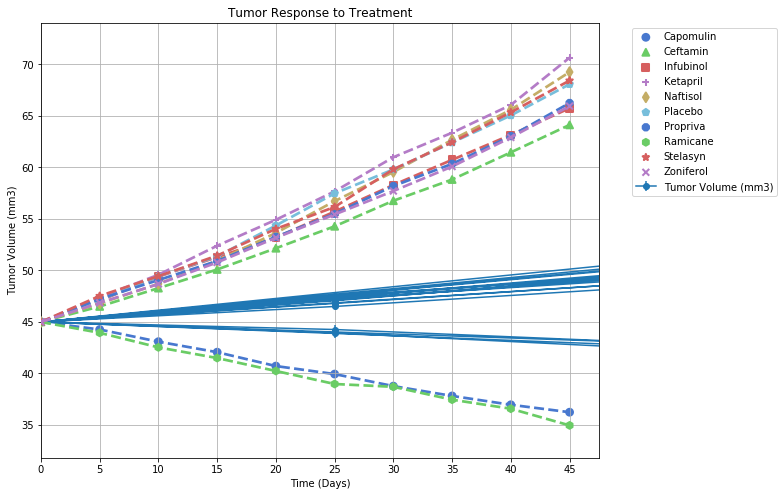

In [15]:
gphtr_df = trmt_df.copy()
gphtr_df = gphtr_df.reset_index(level = ['Drug','Timepoint'])
gphtr_df = gphtr_df.rename(columns = {'Timepoint':'Time (Days)'})

markers = ["o","^","s","+","d","p","8","h","*","x"]
linesty = ["--","--","--","--","--","--","--","--","--","--"]
# gphtr_df

sem = merged_df.copy()
sem = sem.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
sem_df = pd.DataFrame(sem)

sem_df = sem_df.reset_index(level = ("Drug", "Timepoint"))
sem_df = sem_df.rename(columns = {'Timepoint':'Time (Days)',
                                 'Tumor Volume (mm3)':'Standard Error'})

tr_df = trmt_df.reset_index(level = ("Drug", "Timepoint"))
tr_df = tr_df['Tumor Volume (mm3)']

sem_df['Tumor Volume (mm3)'] = tr_df
# sem_df

pivot_sem_df = sem_df.pivot(index="Time (Days)", columns="Drug")["Standard Error"]
# # pivot_sem_df
yerr = sem_df['Standard Error']
x = sem_df['Time (Days)']
y = sem_df['Tumor Volume (mm3)']
# hue = sem_df['Drug']
y

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize = fig_dims)
ax = sns.pointplot('Time (Days)','Tumor Volume (mm3)', hue = 'Drug', data = gphtr_df,
             ci = "sd", markers = markers, linestyles = linesty, 
             palette = sns.color_palette("muted",10), errwidth = 0.1, capsize = 0.2)
ax.set(xlim = (0, None))
plt.errorbar(x, y, yerr = yerr, fmt = '-o')
# plt.show()

#yerr = sem_df['Standard Error']
plt.gca().grid(True)
plt.legend(bbox_to_anchor=(1.05,1),loc =2)
plt.title("Tumor Response to Treatment")
plt.show()

### __Metastatic Response to Treatment__

In [6]:
# Create a DataFrame that compares Metastatic Sites to 'Drug' & 'Timepoint' indices
meta_df = merged_df.copy()
meta_df = meta_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
meta_df = pd.DataFrame(meta_df)
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Standard Error for Metastatic Sites
stderr_msresp = merged_df.copy()
stderr_msresp = stderr_msresp.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
stderr_msresp = pd.DataFrame(stderr_msresp)
stderr_msresp.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Create Pivot df of meta_df (mean)
pvtms_df = meta_df.copy()
pvtms_df = pvtms_df.reset_index(level = ('Drug', 'Timepoint'))
pvtms_df = pvtms_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
pvtms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.333333,0.120000,0.250000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.590909,0.250000,0.500000,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.812500,0.333333,0.818182,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.950000,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


#### Graph of Metastatic Spread During Treatment 
-  x-axis: Treatment Duration (Days); y-axis: Met. Sites
-  include: Labels, Title, Legend, ErrorBars.

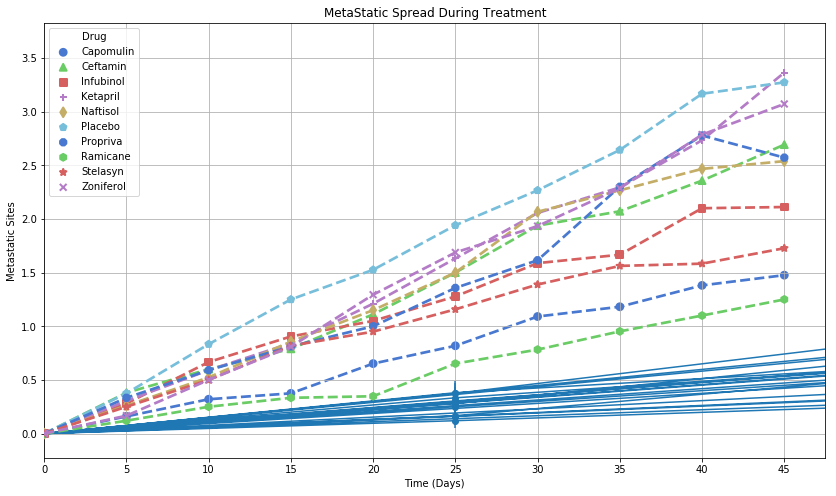

In [9]:
gphms_df = meta_df.copy()
gphms_df = gphms_df.reset_index(level = ['Drug','Timepoint'])
gphms_df = gphms_df.rename(columns = {'Timepoint':'Time (Days)'})
gphms_df = gphms_df['Metastatic Sites']

markers = ["o","^","s","+","d","p","8","h","*","x"]
linesty = ["--","--","--","--","--","--","--","--","--","--"]
# gphtr_df

sem_ms = merged_df.copy()
sem_ms = sem_ms.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
sem_ms_df = pd.DataFrame(sem_ms)

sem_ms_df = sem_ms_df.reset_index(level = ("Drug", "Timepoint"))
sem_ms_df = sem_ms_df.rename(columns = {'Timepoint':'Time (Days)',
                                 'Metastatic Sites':'Standard Error'})

ms_df = meta_df.reset_index(level = ("Drug", "Timepoint"))
ms_df = ms_df.rename(columns= {"Timepoint":"Treatment Duration (Days)"})

# ms_df
sem_ms_df['Metastatic Sites'] = gphms_df

pivot_sem_ms_df = sem_ms_df.pivot(index="Time (Days)", columns="Drug")["Standard Error"]
# pivot_sem_ms_df
yerr = sem_ms_df['Standard Error']
x = sem_ms_df['Time (Days)']
y = sem_ms_df['Metastatic Sites']
# # hue = sem_df['Drug']

fig_dims = (14, 8)
fig, ax = plt.subplots(figsize = fig_dims)
ax = sns.pointplot(x, y, hue = 'Drug', data = gphtr_df,
             ci = "sd", markers = markers, linestyles = linesty, 
             palette = sns.color_palette("muted",10), errwidth = 0.1, capsize = 0.2)
ax.set(xlim = (0, None))
plt.errorbar(x, y, yerr = yerr, fmt = '-o')

#  #yerr = sem_df['Standard Error']
plt.gca().grid(True)
# plt.legend(bbox_to_anchor=(1.05,1),loc =2)
plt.title("MetaStatic Spread During Treatment")
plt.show()

### __Survival Rates__

In [10]:
# Count remaining mice at each TimePoint for each drug
mcnt_df = merged_df.copy()
mcnt_df = mcnt_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
mcnt_df = pd.DataFrame(mcnt_df)
mcnt_df = mcnt_df.rename(columns = {"Mouse ID":"Mouse Count"})
mcnt_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Pivot the table above to show a df with all treatments as columns.
pvt_mcnt = mcnt_df.copy()
pvt_mcnt = pvt_mcnt.reset_index(level = ('Drug','Timepoint'))
pvt_mcnt = pvt_mcnt.pivot(index = 'Timepoint', columns = 'Drug')['Mouse Count']
pvt_mcnt


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


#### Graph of Survival During Treatment 
-  x-axis: Time (Days); y-axis: Survival Rate (%)
-  include: Labels, Title, Legend, ErrorBars.

In [12]:
#first calculate the survival rate
survival_pivot = pvt_mcnt

ca = plt.plot(100 * survival_pivot["Capomulin"] / survival_pivot["Capomulin"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
ce = plt.plot(100 * survival_pivot["Ceftamin"] / survival_pivot["Ceftamin"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
inf= plt.plot(100 * survival_pivot["Infubinol"] / survival_pivot["Infubinol"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
ket=plt.plot(100 * survival_pivot["Ketapril"] / survival_pivot["Ketapril"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
naf=plt.plot(100 * survival_pivot["Naftisol"] / survival_pivot["Naftisol"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
pla=plt.plot(100 * survival_pivot["Placebo"] / survival_pivot["Placebo"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
pro=plt.plot(100 * survival_pivot["Propriva"] / survival_pivot["Propriva"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
ram=plt.plot(100 * survival_pivot["Ramicane"] / survival_pivot["Ramicane"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
ste=plt.plot(100 * survival_pivot["Stelasyn"] / survival_pivot["Stelasyn"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
zon=plt.plot(100 * survival_pivot["Zoniferol"] / survival_pivot["Zoniferol"][0], "ro", linestyle="dashed", markersize=5, linewidth=0.50)
# plt.legend(entries= , keys = , labels= ,)
plt.show()

# srvl_rate

# gphmr_df = meta_df.copy()
# gphmr_df = gphmr_df.reset_index(level = ['Drug','Timepoint'])
# gphmr_df = gphmr_df.rename(columns = {'Timepoint':'Time (Days)'})

# markers = ["o","^","s","+","d","p","8","h","*","x"]
# linesty = ["--","--","--","--","--","--","--","--","--","--"]
# # gphmr_df
# fig_dims = (14, 12)
# fig, ax = plt.subplots(figsize = fig_dims)
# ax = sns.pointplot('Time (Days)','Metastatic Sites', hue = 'Drug', data = gphmr_df,
#              ci = "sd", markers = markers, linestyles = linesty, 
#              palette = sns.color_palette("muted",10))
# ax.set(xlim = (0, None))

# sem_mr = stderr_msresp.copy()
# sem_mr = sem_mr.reset_index(inplace=False)
# sem_mr = sem_mr['Metastatic Sites']
# # sem
# xy_mr = gphmr_df.copy()
# xy_mr = xy_mr.reset_index(inplace=False)
# x_mr = xy_mr['Time (Days)']
# y_mr = xy_mr['Metastatic Sites']

# plt.errorbar(x_mr, y_mr, yerr = sem_mr, fmt = 'o')
# plt.gca().grid(True)
# plt.title("Metastatic Spread During Treatment")
# plt.show()

### __Summary Bar Graph__

In [13]:
# Calculate the Tumor Vol Change % by Drug
tmr_chg = []
for column in pvttv_df:
    row_entry = (pvttv_df.iloc[-1,pvttv_df.columns.get_loc(column)] - \
                 pvttv_df.iloc[0,pvttv_df.columns.get_loc(column)]) \
                /pvttv_df.iloc[0,pvttv_df.columns.get_loc(column)] *100
    tmr_chg.append(row_entry)
# tmr_chg

drug_names = list(pvttv_df.columns.values)
# drug_names

tmr_vol = pd.DataFrame(list(zip(drug_names, tmr_chg)),
                       columns = ['Drug', '% Tumor Volume Change'])

tmr_vol = tmr_vol.set_index('Drug')
tmr_vol
# tmr_vol = pd.DataFrame()

,% Tumor Volume Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


#### Graph of Tumor Change Over 45 Day Treatment
-  x-axis: Drug Names; y-axis: % Tumor Volume Change
-  include: Labels (w/i Bars), Title, Fill Bars {Green for (-)/Red for (+)

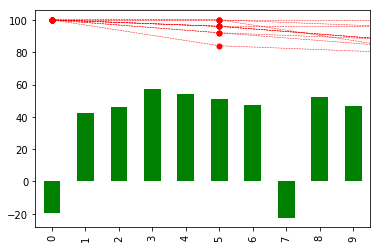

In [14]:
tmr_vol = tmr_vol.reset_index()
x = tmr_vol["Drug"]
y = tmr_vol['% Tumor Volume Change']

tmr_vol['positive'] = tmr_vol['% Tumor Volume Change'] > 0
tmr_vol
# tmr_vol
tmr_vol['% Tumor Volume Change'].plot(kind='bar', color=tmr_vol.positive.map({True: 'r', False: 'g'}))
plt.show()


## Three Observations:
-  In this clinical trial only Capomulin and Ramicane showed a reduction in tumor volume.
-  The treatments about accounted for a survival rate of 80%.
-  All surviving mice display metastatic site growth by the end of the 45 day testing period.